In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Just in case you're using inline plots
%matplotlib inline


In [3]:
# Download Tesla stock data from Yahoo Finance
tesla = yf.download('TSLA', start='2010-01-01')

# Check the first few rows
tesla.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [5]:
tesla.reset_index(inplace=True)


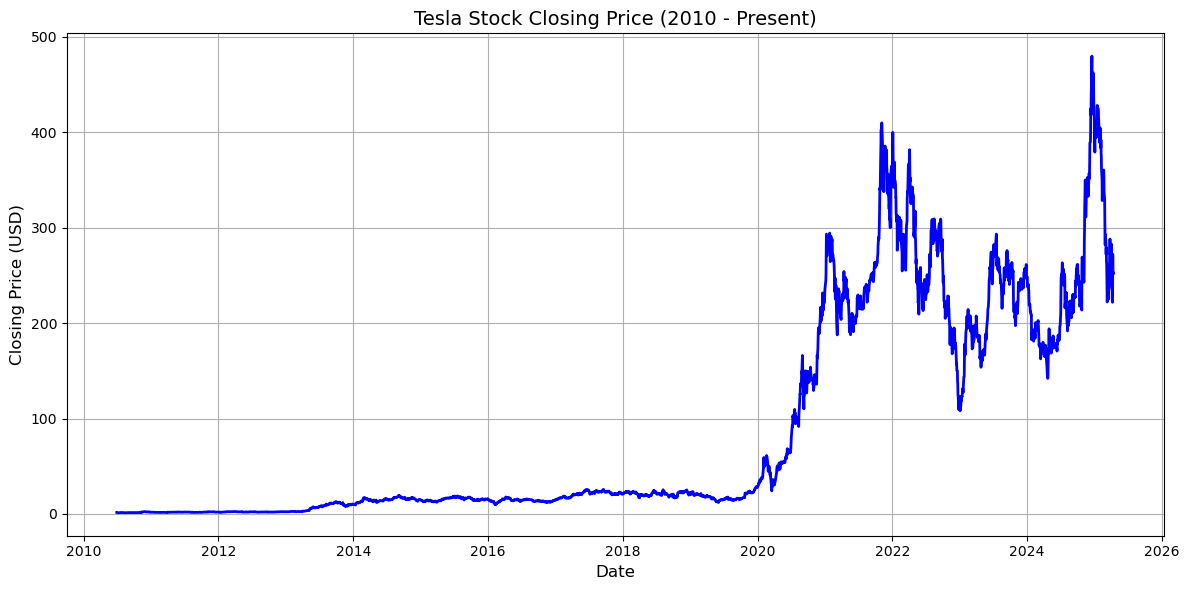

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['Close'], color='blue', linewidth=2)
plt.title('Tesla Stock Closing Price (2010 - Present)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
tesla.describe()
tesla.info()
tesla.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3722 non-null   datetime64[ns]
 1   (Close, TSLA)   3722 non-null   float64       
 2   (High, TSLA)    3722 non-null   float64       
 3   (Low, TSLA)     3722 non-null   float64       
 4   (Open, TSLA)    3722 non-null   float64       
 5   (Volume, TSLA)  3722 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 174.6 KB


Price   Ticker
Date              0
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

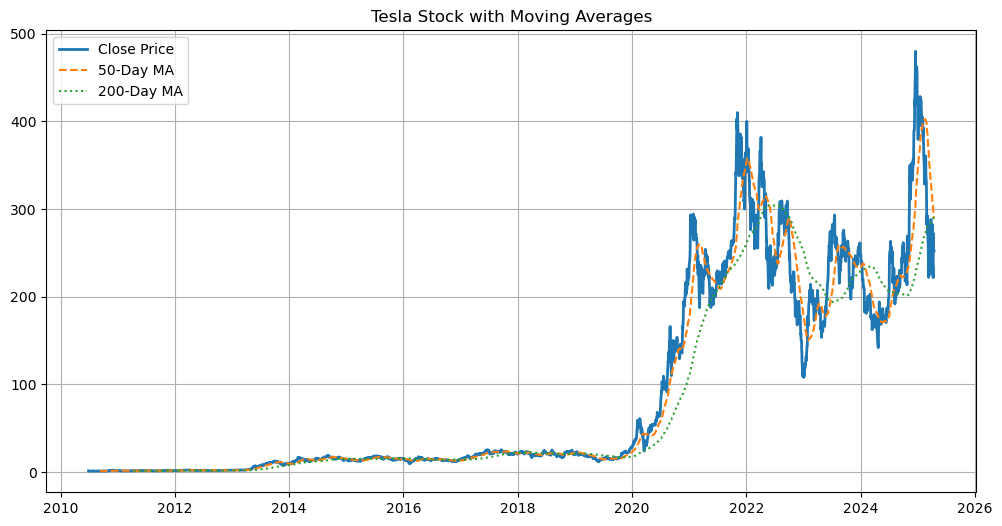

In [11]:
tesla['MA50'] = tesla['Close'].rolling(window=50).mean()
tesla['MA200'] = tesla['Close'].rolling(window=200).mean()

# Plot with MAs
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['Close'], label='Close Price', linewidth=2)
plt.plot(tesla['Date'], tesla['MA50'], label='50-Day MA', linestyle='--')
plt.plot(tesla['Date'], tesla['MA200'], label='200-Day MA', linestyle=':')
plt.legend()
plt.title('Tesla Stock with Moving Averages')
plt.grid(True)
plt.show()


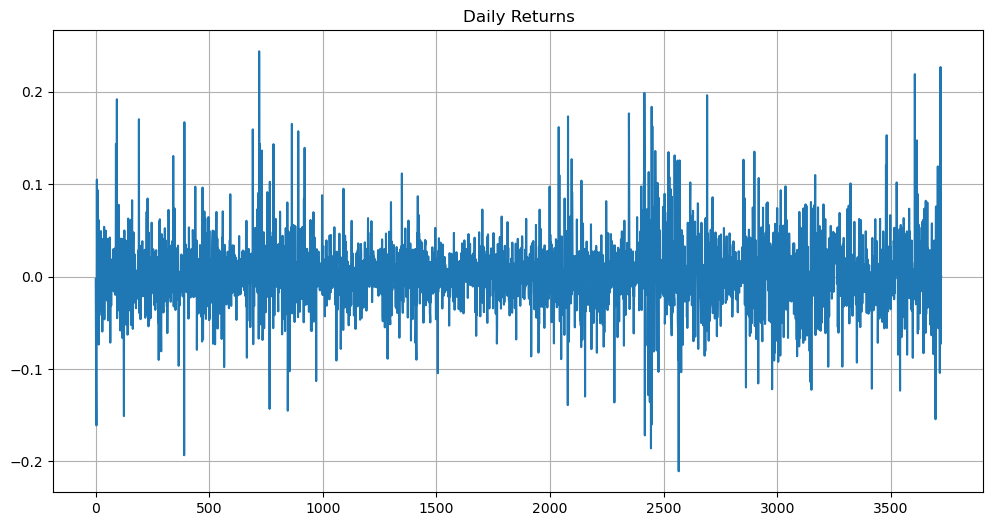

In [13]:
tesla['Daily Return'] = tesla['Close'].pct_change()
tesla['Daily Return'].plot(figsize=(12,6), title='Daily Returns')
plt.grid(True)
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download data
tesla = yf.download('TSLA', start='2010-01-01')
tesla.reset_index(inplace=True)

# Step 2: Filter for last 2 years only
tesla_recent = tesla[tesla['Date'] >= '2023-01-01'].copy()

# Step 3: Calculate Moving Average
tesla_recent['MA50'] = tesla_recent['Close'].rolling(window=50).mean()

# Step 4: Plot clean chart
plt.figure(figsize=(12, 6))
plt.plot(tesla_recent['Date'], tesla_recent['Close'], label='Close Price', color='steelblue', linewidth=2)
plt.plot(tesla_recent['Date'], tesla_recent['MA50'], label='50-Day MA', color='orange', linewidth=2, linestyle='--')

# Clean aesthetics
plt.title('Tesla Close Price with 50-Day Moving Average (2023–2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show


[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(close=None, block=None)>

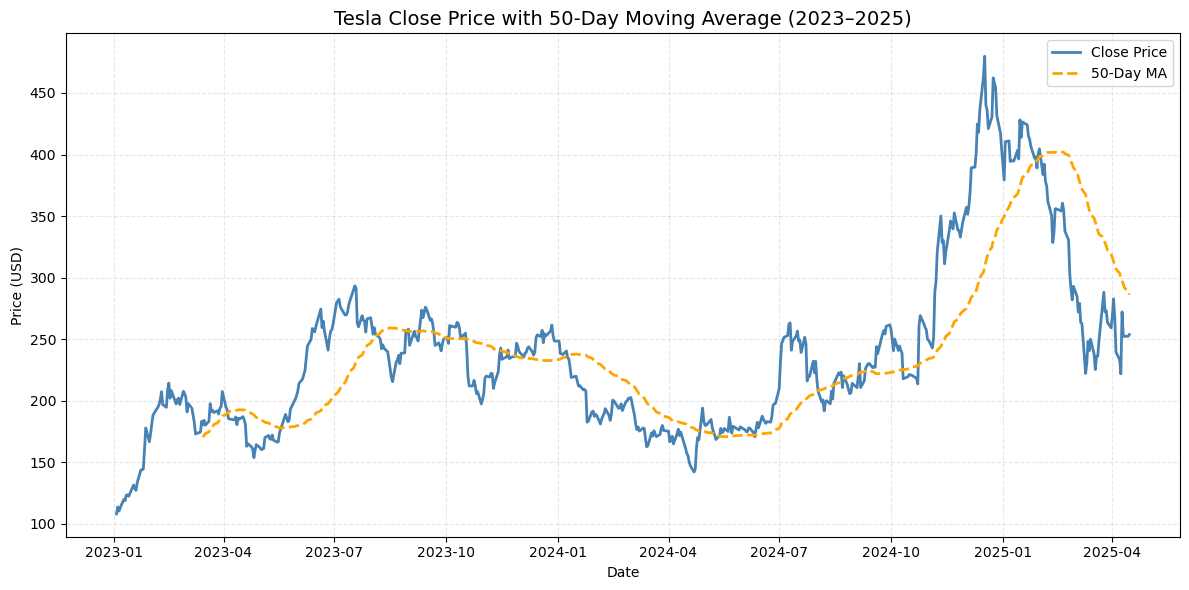

In [17]:
plt.show()  # ✅ This actually displays the plot
